## 
### 1.지도학습
     1) 회귀(regression)
     - 연속적인 데이터
     2) 분류(classification)
     -KNN
     -로지스틱 선형회귀
     -Decision Tree
     - Random Forest
     -SVM
     -Naive bayes
     -인공 신경망
### 2. 비지도학습
    1) 클러스터링(clustering)
    k -means
### 3.인공신경망

1) 훈련(학습) 데이터셋과 테스트 데이터셋
2) 일반화, 과대적합(Overfitting),과소적합(Underfitting)
    - 과대적합 : 훈련 데이터에 너무 잘맞지만 일반성이 떨어지는경우
        - 파라미터 수가 적은 모델을 선택, 훈련데이터의 특성수 줄이거나 
        - 모델 단순화
        - 더 많은 훈련 데이터 
        - 훈련데이터의 잡음을 줄인다.(오류데이터 수정, 이상치제거
    - 과소적합 : 모델이 너무 단순해서 데이터의 내재된 구조를 학습하지 못할 때
        - 모델 파라미터가 더 많은 강력한 모델을 선택한다.
        - 학습 알고리즘에 더 좋은 특성 제공
        - 모델의 제약을 줄인다. 

In [8]:

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc('font',family = font_name)

from sklearn.model_selection import train_test_split
import mglearn
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsRegressor
# pip install mglearn

# KNN (K - Nearest Neighbors)
    1) 특징 
        - 이해하기 쉽고 직관적인 모델
        - 더 복잡한 알고리즘을 적용하기 전에 시도해 볼 수 있는 
        - 훈련셋이 너무 크면 예측이 느려진다. 
        
- 가장 간단한 k-NN 알고리즘은 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측에 사용합니다. 단순히 이 훈련 데이터 포인트의 출력이 예측이 됩니다. 

    2) (하이퍼)파라미터
        - 이웃의 개수 (k갯수) 홀수로만 줘야함
        - 데이터 사이의 거리를 재는 방법 : L2 norm 사용

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


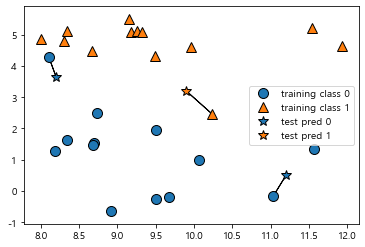

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors = 1
                                     )

# L1 norm L2 norm 

https://itchipmunk.tistory.com/148

https://light-tree.tistory.com/125

In [3]:
from numpy import linalg

df = pd.DataFrame(np.random.randint(low =-3,high = 3,size=(3,3)))
df.columns = ["move_1","move_2","move_3"]
df

,move_1,move_2,move_3
0,-2,0,-3
1,-1,-1,2
2,-3,2,-3


In [4]:
movements = df.values
linalg.norm(movements, ord=1, axis=1) #행기준 ord = norm1 


array([5., 4., 8.])

# 교재
# https://nittaku.tistory.com/290

In [5]:
df = pd.DataFrame(np.random.randint(low = 1, high = 10, size=(3,2)))
df

,0,1
0,7,8
1,2,4
2,1,2


In [6]:
df.columns = ['x','y']
df

,x,y
0,7,8
1,2,4
2,1,2


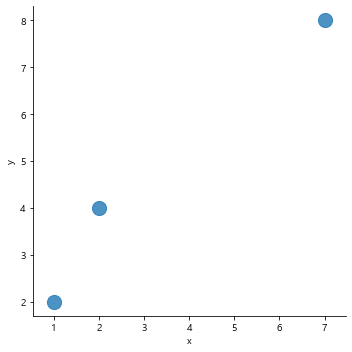

In [7]:
sns.lmplot('x','y',data = df, fit_reg= False, scatter_kws ={"s":200})

In [8]:
movements = df.values
linalg.norm(movements, ord=2, axis=1)

array([10.63014581,  4.47213595,  2.23606798])

## KNN 구현


In [9]:
X,y = mglearn.datasets.make_forge()

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


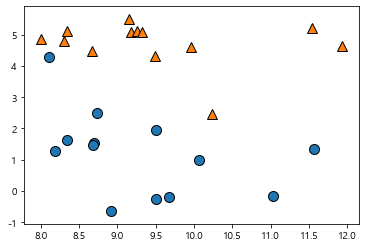

In [10]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #난수 고정하겠다 random_state
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19, 2) (7, 2) (19,) (7,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19, 2) (7, 2) (19,) (7,)


In [13]:
#훈련시키는것 fit()
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3) #이웃의 개수 
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [14]:
# 답은 넘겨주지않음 7개의 데이터 정답결과
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [15]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

In [16]:
clf.score(X_test,y_test) #테스트 결과

0.8571428571428571

In [17]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1) #이웃의 개수 
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [18]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [19]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

In [20]:
clf.score(X_test,y_test) 

0.8571428571428571

# KNN 분석
# 교재
# https://subinium.github.io/MLwithPython-2-3-1/#kneighborsclassifier-%EB%B6%84%EC%84%9D

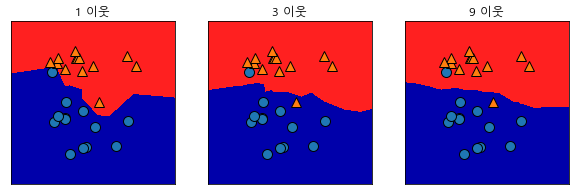

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neigh, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neigh).fit(X, y)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, ax=ax) #구분선
    
    ax.set_title("{} 이웃".format(n_neigh))

In [22]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [23]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [24]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [25]:
cancer.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [26]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [27]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [28]:
X_train, X_test, y_train, y_test = \
train_test_split(cancer.data, cancer.target, random_state = 66
                , stratify = cancer.target)

print(X_train.shape,X_test.shape)
taining_accuracy = []
test_accuracy = []

(426, 30) (143, 30)


In [29]:
train_acc = []
test_acc = []

for n in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(X_train, y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

In [31]:
train_acc
test_acc

[0.9020979020979021,
 0.8881118881118881,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9370629370629371,
 0.9300699300699301,
 0.9300699300699301,
 0.916083916083916,
 0.916083916083916]

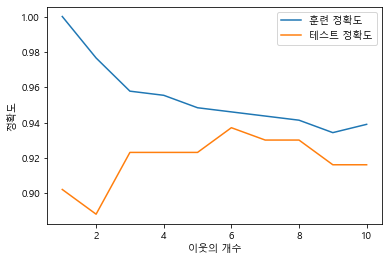

In [35]:

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("이웃의 개수")
plt.legend()

# 회귀분석을 위한 KNN

In [36]:
X, y = mglearn.datasets.make_wave(n_samples=40)

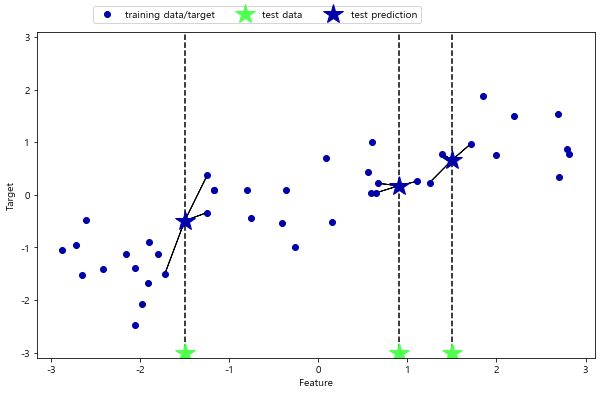

In [40]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [41]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

print(X_train.shqpe, X_test.shape)


AttributeError: 'numpy.ndarray' object has no attribute 'shqpe'

In [43]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors =3)
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [44]:
print("테스트 세트 예측: ",reg.predict(X_test))

테스트 세트 예측:  [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [45]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


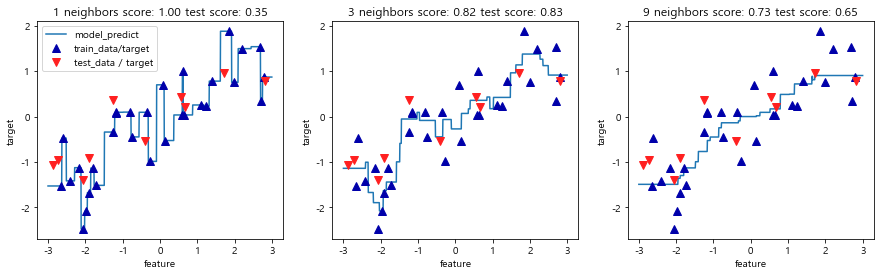

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbors score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
axes[0].legend(["model_predict", "train_data/target", "test_data / target"], loc="best")

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
print(iris.target_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']


In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:


X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print(X_train.shape,X_test.shape)

(112, 4) (38, 4)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8F9104908>,
      dtype=object)

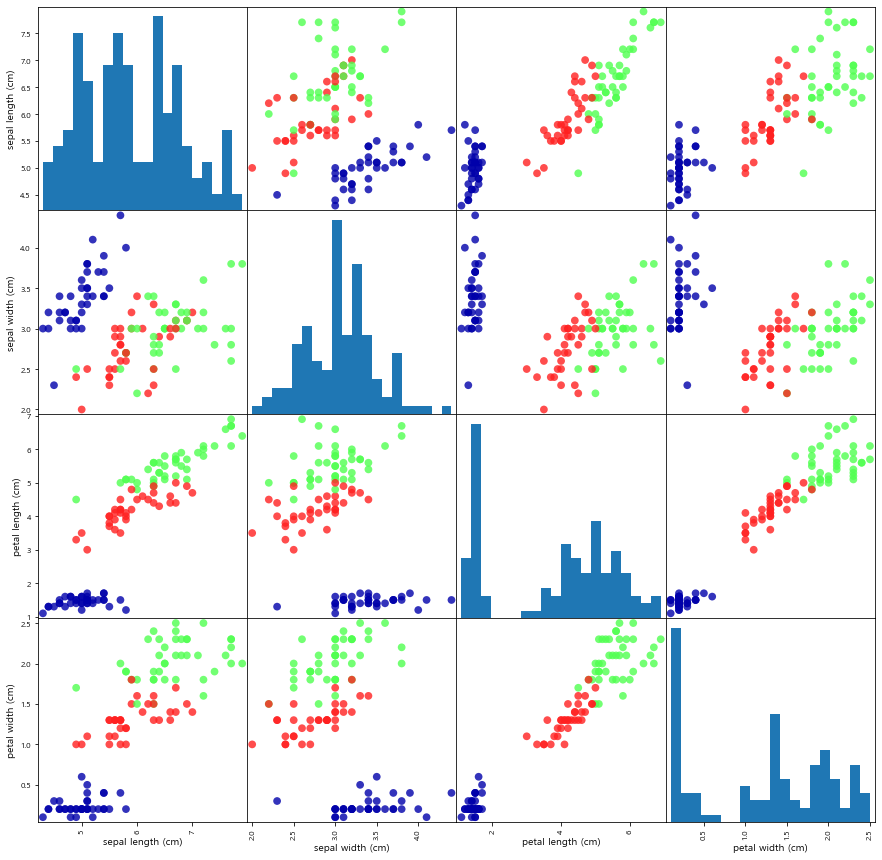

In [6]:
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, figsize=(15, 15), marker="o", c=y_train, s=60, alpha=.8, \
                          cmap=mglearn.cm3, hist_kwds={"bins":20})

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

NameError: name 'KNeighborsClassifier' is not defined

In [54]:
pred=knn.predict(X_test)
pred


ValueError: Expected 2D array, got 1D array instead:
array=[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [56]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [58]:
print("정확도 : ",knn.score(X_test,y_test))
print("정확도 : ",np.mean(pred == y_test))

정확도 :  0.9736842105263158
정확도 :  0.9736842105263158


In [59]:
# Sepal의 길이가 5cm, 폭 2.9cm, Petal의 길이가 1cm, 폭이 0.2cm 인
# 붗꽃의 품종은?

In [62]:
x_new  = np.array([[5,2.9,1,0.2]])
pred = knn.predict(x_new)
pred
print(iris.target_names[pred])

['setosa']
